# 1. Preprocess

In [65]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from nltk import word_tokenize
from gensim.models import word2vec
from gensim.utils import tokenize

## 1.1 Load Data

(1) Load 'taxonomy.csv' file

In [48]:
data_taxonomy = pd.read_csv('taxonomy.csv')
data_taxonomy

,ID,kingdom,phylum,class,order,family,genus,species,sequence
0,ID-10213,k__Bacteria,p__Bacteroidetes,c__[Rhodothermi],o__[Rhodothermales],f__Rhodothermaceae,Unassigned,Unassigned,TACGGAGGGTGCAAGCGTTGTCCGGAATCACTGGGTGTAAAGGGTG...
1,ID-24128,k__Bacteria,p__Bacteroidetes,c__[Rhodothermi],o__[Rhodothermales],Unassigned,Unassigned,Unassigned,TACGGAGGGTGCAAGCGTTGTCCGGAATCACTGGGTGTAAAGGGTG...
2,ID-89036,k__Bacteria,p__Bacteroidetes,c__[Rhodothermi],o__[Rhodothermales],f__Rhodothermaceae,Unassigned,Unassigned,TACGGAGGGTGCAAGCGTTGTCCGGAATCACTGGGTGTAAAGGGTG...
3,ID-65937,k__Bacteria,p__Bacteroidetes,c__[Rhodothermi],o__[Rhodothermales],f__Rhodothermaceae,Unassigned,Unassigned,TACGGAGGGTGCAAGCGTTGTCCGGAATCACTGGGTGTAAAGGGTG...
4,ID-69686,k__Bacteria,p__Bacteroidetes,c__[Rhodothermi],o__[Rhodothermales],f__Rhodothermaceae,g__Rubricoccus,Unassigned,TACGGAGGGTCCAAGCGTTGTCCGGAATCACTGGGTGTAAAGGGTG...
...,...,...,...,...,...,...,...,...,...
27405,ID-59236,k__Bacteria,p__Bacteroidetes,c__Flavobacteriia,Unassigned,Unassigned,Unassigned,Unassigned,TACGGAGGGTCCAAGCGTTATCCGGAATCACTGGGTTTAAAGGGTG...
27406,ID-76670,k__Archaea,p__Crenarchaeota,Unassigned,Unassigned,Unassigned,Unassigned,Unassigned,AACCAGCTCCTCGAGTAGTCGGGAGGATTACTGGGTCTAAAGCGTC...
27407,ID-63560,k__Bacteria,p__VHS-B3-43,Unassigned,Unassigned,Unassigned,Unassigned,Unassigned,CACGTAGGAGGCAAGCGTTGTCCGGAATTACTGGGCGTAAAGGGTG...
27408,ID-75469,k__Archaea,p__Crenarchaeota,c__Thaumarchaeota,o__Nitrosocaldales,f__Nitrosocaldaceae,g__Candidatus Nitrosocaldus,Unassigned,TACCAGCACCCCGAGTGGTCGGGACGATTATTGGGCCTAAAGCATC...


(2) Load '6mer-matrix.csv' file

In [49]:
data_6mer = pd.read_csv('6mer-matrix.csv')
data_6mer

,AAAGGG,AAATCC,AACTGC,AACTGT,AAGCGT,AAGGGT,AAGTCA,AATCAC,AATCCC,AATTCG,...,CCACTC,TTACAC,ACACAC,CTCCAC,CACCAC,CACCAT,AGATCC,TGACCC,CACTAT,ACACCC
0,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1,0,2,0,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,1,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,1,0,1,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27405,1,0,1,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
27406,0,1,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27407,1,1,1,0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
27408,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 1.2 Preprocess 'data_taxonomy' with K-mers

(1) K-mers function

In [50]:
def k_mers_preprocess(squence, k=6):
    length = len(squence)
    kmers_result = ''
    
    for i in range(length-k+1):
        kmers_result = kmers_result+' '+squence[i:i+k]
    
    kmers_result = kmers_result.strip()  # Remove the space at the begin and end of the string
    
    return kmers_result

(2) Preprocess 'data_taxonomy' with k-mers

In [51]:
# Get the number of sequence
data_size = data_taxonomy.shape[0]
# The k value of k-mers
k = 6
# Store the results after k-mers
sequence_kmers = list()

for i in range(data_size):
    sequence_kmers.append(k_mers_preprocess(data_taxonomy['sequence'][i], k))

#sequence_kmers

In [52]:
# Add the results after k-mers to data_taxonomy
data_taxonomy['sequence_kmers'] = sequence_kmers
data_taxonomy

,ID,kingdom,phylum,class,order,family,genus,species,sequence,sequence_kmers
0,ID-10213,k__Bacteria,p__Bacteroidetes,c__[Rhodothermi],o__[Rhodothermales],f__Rhodothermaceae,Unassigned,Unassigned,TACGGAGGGTGCAAGCGTTGTCCGGAATCACTGGGTGTAAAGGGTG...,TACGGA ACGGAG CGGAGG GGAGGG GAGGGT AGGGTG GGGT...
1,ID-24128,k__Bacteria,p__Bacteroidetes,c__[Rhodothermi],o__[Rhodothermales],Unassigned,Unassigned,Unassigned,TACGGAGGGTGCAAGCGTTGTCCGGAATCACTGGGTGTAAAGGGTG...,TACGGA ACGGAG CGGAGG GGAGGG GAGGGT AGGGTG GGGT...
2,ID-89036,k__Bacteria,p__Bacteroidetes,c__[Rhodothermi],o__[Rhodothermales],f__Rhodothermaceae,Unassigned,Unassigned,TACGGAGGGTGCAAGCGTTGTCCGGAATCACTGGGTGTAAAGGGTG...,TACGGA ACGGAG CGGAGG GGAGGG GAGGGT AGGGTG GGGT...
3,ID-65937,k__Bacteria,p__Bacteroidetes,c__[Rhodothermi],o__[Rhodothermales],f__Rhodothermaceae,Unassigned,Unassigned,TACGGAGGGTGCAAGCGTTGTCCGGAATCACTGGGTGTAAAGGGTG...,TACGGA ACGGAG CGGAGG GGAGGG GAGGGT AGGGTG GGGT...
4,ID-69686,k__Bacteria,p__Bacteroidetes,c__[Rhodothermi],o__[Rhodothermales],f__Rhodothermaceae,g__Rubricoccus,Unassigned,TACGGAGGGTCCAAGCGTTGTCCGGAATCACTGGGTGTAAAGGGTG...,TACGGA ACGGAG CGGAGG GGAGGG GAGGGT AGGGTC GGGT...
...,...,...,...,...,...,...,...,...,...,...
27405,ID-59236,k__Bacteria,p__Bacteroidetes,c__Flavobacteriia,Unassigned,Unassigned,Unassigned,Unassigned,TACGGAGGGTCCAAGCGTTATCCGGAATCACTGGGTTTAAAGGGTG...,TACGGA ACGGAG CGGAGG GGAGGG GAGGGT AGGGTC GGGT...
27406,ID-76670,k__Archaea,p__Crenarchaeota,Unassigned,Unassigned,Unassigned,Unassigned,Unassigned,AACCAGCTCCTCGAGTAGTCGGGAGGATTACTGGGTCTAAAGCGTC...,AACCAG ACCAGC CCAGCT CAGCTC AGCTCC GCTCCT CTCC...
27407,ID-63560,k__Bacteria,p__VHS-B3-43,Unassigned,Unassigned,Unassigned,Unassigned,Unassigned,CACGTAGGAGGCAAGCGTTGTCCGGAATTACTGGGCGTAAAGGGTG...,CACGTA ACGTAG CGTAGG GTAGGA TAGGAG AGGAGG GGAG...
27408,ID-75469,k__Archaea,p__Crenarchaeota,c__Thaumarchaeota,o__Nitrosocaldales,f__Nitrosocaldaceae,g__Candidatus Nitrosocaldus,Unassigned,TACCAGCACCCCGAGTGGTCGGGACGATTATTGGGCCTAAAGCATC...,TACCAG ACCAGC CCAGCA CAGCAC AGCACC GCACCC CACC...


In [7]:
data_taxonomy.to_csv('taxonomy_new.csv')

## 1.3 Feature Engineering

(1) Select three ranks: 'kingdom', 'phylum', 'class'

In [53]:
data_taxonomy = data_taxonomy.drop(columns = ['order','family','genus','species'])
data_taxonomy

,ID,kingdom,phylum,class,sequence,sequence_kmers
0,ID-10213,k__Bacteria,p__Bacteroidetes,c__[Rhodothermi],TACGGAGGGTGCAAGCGTTGTCCGGAATCACTGGGTGTAAAGGGTG...,TACGGA ACGGAG CGGAGG GGAGGG GAGGGT AGGGTG GGGT...
1,ID-24128,k__Bacteria,p__Bacteroidetes,c__[Rhodothermi],TACGGAGGGTGCAAGCGTTGTCCGGAATCACTGGGTGTAAAGGGTG...,TACGGA ACGGAG CGGAGG GGAGGG GAGGGT AGGGTG GGGT...
2,ID-89036,k__Bacteria,p__Bacteroidetes,c__[Rhodothermi],TACGGAGGGTGCAAGCGTTGTCCGGAATCACTGGGTGTAAAGGGTG...,TACGGA ACGGAG CGGAGG GGAGGG GAGGGT AGGGTG GGGT...
3,ID-65937,k__Bacteria,p__Bacteroidetes,c__[Rhodothermi],TACGGAGGGTGCAAGCGTTGTCCGGAATCACTGGGTGTAAAGGGTG...,TACGGA ACGGAG CGGAGG GGAGGG GAGGGT AGGGTG GGGT...
4,ID-69686,k__Bacteria,p__Bacteroidetes,c__[Rhodothermi],TACGGAGGGTCCAAGCGTTGTCCGGAATCACTGGGTGTAAAGGGTG...,TACGGA ACGGAG CGGAGG GGAGGG GAGGGT AGGGTC GGGT...
...,...,...,...,...,...,...
27405,ID-59236,k__Bacteria,p__Bacteroidetes,c__Flavobacteriia,TACGGAGGGTCCAAGCGTTATCCGGAATCACTGGGTTTAAAGGGTG...,TACGGA ACGGAG CGGAGG GGAGGG GAGGGT AGGGTC GGGT...
27406,ID-76670,k__Archaea,p__Crenarchaeota,Unassigned,AACCAGCTCCTCGAGTAGTCGGGAGGATTACTGGGTCTAAAGCGTC...,AACCAG ACCAGC CCAGCT CAGCTC AGCTCC GCTCCT CTCC...
27407,ID-63560,k__Bacteria,p__VHS-B3-43,Unassigned,CACGTAGGAGGCAAGCGTTGTCCGGAATTACTGGGCGTAAAGGGTG...,CACGTA ACGTAG CGTAGG GTAGGA TAGGAG AGGAGG GGAG...
27408,ID-75469,k__Archaea,p__Crenarchaeota,c__Thaumarchaeota,TACCAGCACCCCGAGTGGTCGGGACGATTATTGGGCCTAAAGCATC...,TACCAG ACCAGC CCAGCA CAGCAC AGCACC GCACCC CACC...


(2) Observe the classifications of three ranks, respectively.

In [54]:
print("Kingdom: {}".format(np.unique(data_taxonomy['kingdom'])))
print("Phylum: {}".format(np.unique(data_taxonomy['phylum'])))
print("Class: {}".format(np.unique(data_taxonomy['class'])))
# print("Order: {}".format(np.unique(data_taxonomy['order'])))
# print("Family: {}".format(np.unique(data_taxonomy['family'])))
# print("Genus: {}".format(np.unique(data_taxonomy['genus'])))
# print("Species: {}".format(np.unique(data_taxonomy['species'])))

Kingdom: ['Unassigned' 'k__Archaea' 'k__Bacteria']
Phylum: ['Unassigned' 'p__AC1' 'p__AD3' 'p__Acidobacteria' 'p__Actinobacteria'
 'p__AncK6' 'p__Aquificae' 'p__Armatimonadetes' 'p__BHI80-139' 'p__BRC1'
 'p__Bacteroidetes' 'p__CD12' 'p__Caldithrix' 'p__Chlamydiae'
 'p__Chlorobi' 'p__Chloroflexi' 'p__Crenarchaeota' 'p__Cyanobacteria'
 'p__Elusimicrobia' 'p__Euryarchaeota' 'p__FBP' 'p__FCPU426'
 'p__Fibrobacteres' 'p__Firmicutes' 'p__Fusobacteria' 'p__GAL15' 'p__GN02'
 'p__GN04' 'p__GOUTA4' 'p__Gemmatimonadetes' 'p__H-178' 'p__Hyd24-12'
 'p__KSB3' 'p__LCP-89' 'p__Lentisphaerae' 'p__MVP-21' 'p__MVS-104'
 'p__NC10' 'p__NKB19' 'p__NPL-UPA2' 'p__Nitrospirae' 'p__OC31' 'p__OD1'
 'p__OP1' 'p__OP11' 'p__OP3' 'p__OP8' 'p__OP9' 'p__PAUC34f'
 'p__Planctomycetes' 'p__Poribacteria' 'p__Proteobacteria' 'p__SAR406'
 'p__SBR1093' 'p__SC4' 'p__SR1' 'p__Spirochaetes' 'p__Synergistetes'
 'p__TM6' 'p__TM7' 'p__Tenericutes' 'p__VHS-B3-43' 'p__Verrucomicrobia'
 'p__WPS-2' 'p__WS1' 'p__WS2' 'p__WS3' 'p__WS5' 

(3) Count the number of each category

In [55]:
counts = data_taxonomy.groupby(['kingdom','phylum','class'])['sequence'].count().reset_index(name = 'Count')
counts

,kingdom,phylum,class,Count
0,Unassigned,Unassigned,Unassigned,15
1,k__Archaea,Unassigned,Unassigned,57
2,k__Archaea,p__Crenarchaeota,Unassigned,1
3,k__Archaea,p__Crenarchaeota,c__AAG,2
4,k__Archaea,p__Crenarchaeota,c__MBGA,3
...,...,...,...,...
241,k__Bacteria,p__WWE1,c__[Cloacamonae],4
242,k__Bacteria,p__ZB3,Unassigned,4
243,k__Bacteria,p__ZB3,c__BS119,9
244,k__Bacteria,p__[Caldithrix],c__KSB1,11


(4) Remove the data whose count is less than 4.

In [56]:
counts = counts[counts['Count']>3]

class_c = list(counts['class']) # Save the 'class_n' attribute whose count is greater than 1.

data_taxonomy = data_taxonomy[data_taxonomy['class'].isin(class_c)]
data_taxonomy

,ID,kingdom,phylum,class,sequence,sequence_kmers
0,ID-10213,k__Bacteria,p__Bacteroidetes,c__[Rhodothermi],TACGGAGGGTGCAAGCGTTGTCCGGAATCACTGGGTGTAAAGGGTG...,TACGGA ACGGAG CGGAGG GGAGGG GAGGGT AGGGTG GGGT...
1,ID-24128,k__Bacteria,p__Bacteroidetes,c__[Rhodothermi],TACGGAGGGTGCAAGCGTTGTCCGGAATCACTGGGTGTAAAGGGTG...,TACGGA ACGGAG CGGAGG GGAGGG GAGGGT AGGGTG GGGT...
2,ID-89036,k__Bacteria,p__Bacteroidetes,c__[Rhodothermi],TACGGAGGGTGCAAGCGTTGTCCGGAATCACTGGGTGTAAAGGGTG...,TACGGA ACGGAG CGGAGG GGAGGG GAGGGT AGGGTG GGGT...
3,ID-65937,k__Bacteria,p__Bacteroidetes,c__[Rhodothermi],TACGGAGGGTGCAAGCGTTGTCCGGAATCACTGGGTGTAAAGGGTG...,TACGGA ACGGAG CGGAGG GGAGGG GAGGGT AGGGTG GGGT...
4,ID-69686,k__Bacteria,p__Bacteroidetes,c__[Rhodothermi],TACGGAGGGTCCAAGCGTTGTCCGGAATCACTGGGTGTAAAGGGTG...,TACGGA ACGGAG CGGAGG GGAGGG GAGGGT AGGGTC GGGT...
...,...,...,...,...,...,...
27405,ID-59236,k__Bacteria,p__Bacteroidetes,c__Flavobacteriia,TACGGAGGGTCCAAGCGTTATCCGGAATCACTGGGTTTAAAGGGTG...,TACGGA ACGGAG CGGAGG GGAGGG GAGGGT AGGGTC GGGT...
27406,ID-76670,k__Archaea,p__Crenarchaeota,Unassigned,AACCAGCTCCTCGAGTAGTCGGGAGGATTACTGGGTCTAAAGCGTC...,AACCAG ACCAGC CCAGCT CAGCTC AGCTCC GCTCCT CTCC...
27407,ID-63560,k__Bacteria,p__VHS-B3-43,Unassigned,CACGTAGGAGGCAAGCGTTGTCCGGAATTACTGGGCGTAAAGGGTG...,CACGTA ACGTAG CGTAGG GTAGGA TAGGAG AGGAGG GGAG...
27408,ID-75469,k__Archaea,p__Crenarchaeota,c__Thaumarchaeota,TACCAGCACCCCGAGTGGTCGGGACGATTATTGGGCCTAAAGCATC...,TACCAG ACCAGC CCAGCA CAGCAC AGCACC GCACCC CACC...


In [ ]:
# data_taxonomy['kingdom'].value_counts().reset_index(name = 'Count')
# data_taxonomy['phylum'].value_counts().reset_index(name = 'Count')
# data_taxonomy['class'].value_counts().reset_index(name = 'Count')

In [57]:
data_taxonomy.to_csv('taxonomy_preprocessed.csv')

(5) Remove the 'Unassigned' data

In [58]:
data_taxonomy = data_taxonomy[data_taxonomy['kingdom'] != 'Unassigned']
data_taxonomy = data_taxonomy[data_taxonomy['phylum'] != 'Unassigned']
data_taxonomy = data_taxonomy[data_taxonomy['class'] != 'Unassigned']
data_taxonomy

,ID,kingdom,phylum,class,sequence,sequence_kmers
0,ID-10213,k__Bacteria,p__Bacteroidetes,c__[Rhodothermi],TACGGAGGGTGCAAGCGTTGTCCGGAATCACTGGGTGTAAAGGGTG...,TACGGA ACGGAG CGGAGG GGAGGG GAGGGT AGGGTG GGGT...
1,ID-24128,k__Bacteria,p__Bacteroidetes,c__[Rhodothermi],TACGGAGGGTGCAAGCGTTGTCCGGAATCACTGGGTGTAAAGGGTG...,TACGGA ACGGAG CGGAGG GGAGGG GAGGGT AGGGTG GGGT...
2,ID-89036,k__Bacteria,p__Bacteroidetes,c__[Rhodothermi],TACGGAGGGTGCAAGCGTTGTCCGGAATCACTGGGTGTAAAGGGTG...,TACGGA ACGGAG CGGAGG GGAGGG GAGGGT AGGGTG GGGT...
3,ID-65937,k__Bacteria,p__Bacteroidetes,c__[Rhodothermi],TACGGAGGGTGCAAGCGTTGTCCGGAATCACTGGGTGTAAAGGGTG...,TACGGA ACGGAG CGGAGG GGAGGG GAGGGT AGGGTG GGGT...
4,ID-69686,k__Bacteria,p__Bacteroidetes,c__[Rhodothermi],TACGGAGGGTCCAAGCGTTGTCCGGAATCACTGGGTGTAAAGGGTG...,TACGGA ACGGAG CGGAGG GGAGGG GAGGGT AGGGTC GGGT...
...,...,...,...,...,...,...
27400,ID-50131,k__Bacteria,p__Spirochaetes,c__Spirochaetes,TACGTAAGGAGCGAGCGTTGTTCGGATTTATTGGGCGTAAAGGGCG...,TACGTA ACGTAA CGTAAG GTAAGG TAAGGA AAGGAG AGGA...
27402,ID-53233,k__Bacteria,p__Chloroflexi,c__Thermomicrobia,TACGTAGGGTCCGAGCGTTGTCCGGAGTGACTGGGCGTAAAGCGCG...,TACGTA ACGTAG CGTAGG GTAGGG TAGGGT AGGGTC GGGT...
27405,ID-59236,k__Bacteria,p__Bacteroidetes,c__Flavobacteriia,TACGGAGGGTCCAAGCGTTATCCGGAATCACTGGGTTTAAAGGGTG...,TACGGA ACGGAG CGGAGG GGAGGG GAGGGT AGGGTC GGGT...
27408,ID-75469,k__Archaea,p__Crenarchaeota,c__Thaumarchaeota,TACCAGCACCCCGAGTGGTCGGGACGATTATTGGGCCTAAAGCATC...,TACCAG ACCAGC CCAGCA CAGCAC AGCACC GCACCC CACC...


In [59]:
print("Kingdom: {}".format(np.unique(data_taxonomy['kingdom'])))
print("Phylum: {}".format(np.unique(data_taxonomy['phylum'])))
print("Class: {}".format(np.unique(data_taxonomy['class'])))

Kingdom: ['k__Archaea' 'k__Bacteria']
Phylum: ['p__AD3' 'p__Acidobacteria' 'p__Actinobacteria' 'p__Armatimonadetes'
 'p__BRC1' 'p__Bacteroidetes' 'p__Caldithrix' 'p__Chlamydiae'
 'p__Chlorobi' 'p__Chloroflexi' 'p__Crenarchaeota' 'p__Cyanobacteria'
 'p__Elusimicrobia' 'p__Euryarchaeota' 'p__Fibrobacteres' 'p__Firmicutes'
 'p__Fusobacteria' 'p__GN02' 'p__GN04' 'p__Gemmatimonadetes' 'p__Hyd24-12'
 'p__LCP-89' 'p__Lentisphaerae' 'p__NC10' 'p__Nitrospirae' 'p__OD1'
 'p__OP11' 'p__OP3' 'p__OP8' 'p__OP9' 'p__Planctomycetes'
 'p__Proteobacteria' 'p__SAR406' 'p__Spirochaetes' 'p__Synergistetes'
 'p__TM6' 'p__TM7' 'p__Tenericutes' 'p__Verrucomicrobia' 'p__WS2' 'p__WS3'
 'p__WWE1' 'p__ZB3' 'p__[Caldithrix]' 'p__[Parvarchaeota]' 'p__[Thermi]']
Class: ['c__028H05-P-BN-P5' 'c__0319-6E2' 'c__12-24' 'c__4C0d-2' 'c__AB16'
 'c__ABS-6' 'c__ABY1' 'c__AT-s2-57' 'c__AT-s54' 'c__Acidimicrobiia'
 'c__Acidobacteria-5' 'c__Acidobacteria-6' 'c__Acidobacteriia'
 'c__Actinobacteria' 'c__Alphaproteobacteria' 'c__An

(6) Change the categoric attributes into numeric attributes

In [60]:
kingdoms = np.unique(data_taxonomy['kingdom'])
phylums = np.unique(data_taxonomy['phylum'])
classes = np.unique(data_taxonomy['class'])

In [101]:
# kingdom
kingdoms_dic = {}
kingdoms_dic_rev = {}
for i in range(len(kingdoms)):
    kingdoms_dic[kingdoms[i]] = i
    kingdoms_dic_rev[i] = kingdoms[i]

# phylum
phylums_dic = {}
phylums_dic_rev = {}
for i in range(len(phylums)):
    phylums_dic[phylums[i]] = i
    phylums_dic_rev[i] = phylums[i]

# class
classes_dic = {}
classes_dic_rev = {}
for i in range(len(classes)):
    classes_dic[classes[i]] = i
    classes_dic_rev[i] = classes[i]
    
print("Kingdom Map: {}".format(kingdoms_dic))
print("Phylum Map: {}".format(phylums_dic))
print("Class Map: {}".format(classes_dic))

Kingdom Map: {'k__Archaea': 0, 'k__Bacteria': 1}
Phylum Map: {'p__AD3': 0, 'p__Acidobacteria': 1, 'p__Actinobacteria': 2, 'p__Armatimonadetes': 3, 'p__BRC1': 4, 'p__Bacteroidetes': 5, 'p__Caldithrix': 6, 'p__Chlamydiae': 7, 'p__Chlorobi': 8, 'p__Chloroflexi': 9, 'p__Crenarchaeota': 10, 'p__Cyanobacteria': 11, 'p__Elusimicrobia': 12, 'p__Euryarchaeota': 13, 'p__Fibrobacteres': 14, 'p__Firmicutes': 15, 'p__Fusobacteria': 16, 'p__GN02': 17, 'p__GN04': 18, 'p__Gemmatimonadetes': 19, 'p__Hyd24-12': 20, 'p__LCP-89': 21, 'p__Lentisphaerae': 22, 'p__NC10': 23, 'p__Nitrospirae': 24, 'p__OD1': 25, 'p__OP11': 26, 'p__OP3': 27, 'p__OP8': 28, 'p__OP9': 29, 'p__Planctomycetes': 30, 'p__Proteobacteria': 31, 'p__SAR406': 32, 'p__Spirochaetes': 33, 'p__Synergistetes': 34, 'p__TM6': 35, 'p__TM7': 36, 'p__Tenericutes': 37, 'p__Verrucomicrobia': 38, 'p__WS2': 39, 'p__WS3': 40, 'p__WWE1': 41, 'p__ZB3': 42, 'p__[Caldithrix]': 43, 'p__[Parvarchaeota]': 44, 'p__[Thermi]': 45}
Class Map: {'c__028H05-P-BN-P5': 

In [62]:
data_taxonomy.insert(2, 'kingdom_n', [kingdoms_dic[i] for i in data_taxonomy['kingdom']])
data_taxonomy.insert(4, 'phylum_n', [phylums_dic[i] for i in data_taxonomy['phylum']])
data_taxonomy.insert(6, 'class_n', [classes_dic[i] for i in data_taxonomy['class']])
data_taxonomy

,ID,kingdom,kingdom_n,phylum,phylum_n,class,class_n,sequence,sequence_kmers
0,ID-10213,k__Bacteria,1,p__Bacteroidetes,5,c__[Rhodothermi],149,TACGGAGGGTGCAAGCGTTGTCCGGAATCACTGGGTGTAAAGGGTG...,TACGGA ACGGAG CGGAGG GGAGGG GAGGGT AGGGTG GGGT...
1,ID-24128,k__Bacteria,1,p__Bacteroidetes,5,c__[Rhodothermi],149,TACGGAGGGTGCAAGCGTTGTCCGGAATCACTGGGTGTAAAGGGTG...,TACGGA ACGGAG CGGAGG GGAGGG GAGGGT AGGGTG GGGT...
2,ID-89036,k__Bacteria,1,p__Bacteroidetes,5,c__[Rhodothermi],149,TACGGAGGGTGCAAGCGTTGTCCGGAATCACTGGGTGTAAAGGGTG...,TACGGA ACGGAG CGGAGG GGAGGG GAGGGT AGGGTG GGGT...
3,ID-65937,k__Bacteria,1,p__Bacteroidetes,5,c__[Rhodothermi],149,TACGGAGGGTGCAAGCGTTGTCCGGAATCACTGGGTGTAAAGGGTG...,TACGGA ACGGAG CGGAGG GGAGGG GAGGGT AGGGTG GGGT...
4,ID-69686,k__Bacteria,1,p__Bacteroidetes,5,c__[Rhodothermi],149,TACGGAGGGTCCAAGCGTTGTCCGGAATCACTGGGTGTAAAGGGTG...,TACGGA ACGGAG CGGAGG GGAGGG GAGGGT AGGGTC GGGT...
...,...,...,...,...,...,...,...,...,...
27400,ID-50131,k__Bacteria,1,p__Spirochaetes,33,c__Spirochaetes,118,TACGTAAGGAGCGAGCGTTGTTCGGATTTATTGGGCGTAAAGGGCG...,TACGTA ACGTAA CGTAAG GTAAGG TAAGGA AAGGAG AGGA...
27402,ID-53233,k__Bacteria,1,p__Chloroflexi,9,c__Thermomicrobia,130,TACGTAGGGTCCGAGCGTTGTCCGGAGTGACTGGGCGTAAAGCGCG...,TACGTA ACGTAG CGTAGG GTAGGG TAGGGT AGGGTC GGGT...
27405,ID-59236,k__Bacteria,1,p__Bacteroidetes,5,c__Flavobacteriia,52,TACGGAGGGTCCAAGCGTTATCCGGAATCACTGGGTTTAAAGGGTG...,TACGGA ACGGAG CGGAGG GGAGGG GAGGGT AGGGTC GGGT...
27408,ID-75469,k__Archaea,0,p__Crenarchaeota,10,c__Thaumarchaeota,128,TACCAGCACCCCGAGTGGTCGGGACGATTATTGGGCCTAAAGCATC...,TACCAG ACCAGC CCAGCA CAGCAC AGCACC GCACCC CACC...


(7) Remove the categoric attributes

In [63]:
data_taxonomy = data_taxonomy.drop(columns = ['kingdom','phylum','class'])
data_taxonomy

,ID,kingdom_n,phylum_n,class_n,sequence,sequence_kmers
0,ID-10213,1,5,149,TACGGAGGGTGCAAGCGTTGTCCGGAATCACTGGGTGTAAAGGGTG...,TACGGA ACGGAG CGGAGG GGAGGG GAGGGT AGGGTG GGGT...
1,ID-24128,1,5,149,TACGGAGGGTGCAAGCGTTGTCCGGAATCACTGGGTGTAAAGGGTG...,TACGGA ACGGAG CGGAGG GGAGGG GAGGGT AGGGTG GGGT...
2,ID-89036,1,5,149,TACGGAGGGTGCAAGCGTTGTCCGGAATCACTGGGTGTAAAGGGTG...,TACGGA ACGGAG CGGAGG GGAGGG GAGGGT AGGGTG GGGT...
3,ID-65937,1,5,149,TACGGAGGGTGCAAGCGTTGTCCGGAATCACTGGGTGTAAAGGGTG...,TACGGA ACGGAG CGGAGG GGAGGG GAGGGT AGGGTG GGGT...
4,ID-69686,1,5,149,TACGGAGGGTCCAAGCGTTGTCCGGAATCACTGGGTGTAAAGGGTG...,TACGGA ACGGAG CGGAGG GGAGGG GAGGGT AGGGTC GGGT...
...,...,...,...,...,...,...
27400,ID-50131,1,33,118,TACGTAAGGAGCGAGCGTTGTTCGGATTTATTGGGCGTAAAGGGCG...,TACGTA ACGTAA CGTAAG GTAAGG TAAGGA AAGGAG AGGA...
27402,ID-53233,1,9,130,TACGTAGGGTCCGAGCGTTGTCCGGAGTGACTGGGCGTAAAGCGCG...,TACGTA ACGTAG CGTAGG GTAGGG TAGGGT AGGGTC GGGT...
27405,ID-59236,1,5,52,TACGGAGGGTCCAAGCGTTATCCGGAATCACTGGGTTTAAAGGGTG...,TACGGA ACGGAG CGGAGG GGAGGG GAGGGT AGGGTC GGGT...
27408,ID-75469,0,10,128,TACCAGCACCCCGAGTGGTCGGGACGATTATTGGGCCTAAAGCATC...,TACCAG ACCAGC CCAGCA CAGCAC AGCACC GCACCC CACC...


In [64]:
data_taxonomy.to_csv('taxonomy_preprocessed2.csv')

Graph (Line Chart)

In [80]:
# k_x = np.unique(data_taxonomy['kingdom_n'])
# p_x = np.unique(data_taxonomy['phylum_n'])
# c_x = np.unique(data_taxonomy['class_n'])

In [100]:
k_y = data_taxonomy.groupby(['kingdom_n'])['sequence'].count().reset_index(name = 'Count')
p_y = data_taxonomy.groupby(['phylum_n'])['sequence'].count().reset_index(name = 'Count')
c_y = data_taxonomy.groupby(['class_n'])['sequence'].count().reset_index(name = 'Count')

In [103]:
k_label = [kingdoms_dic_rev[i] for i in k_y['kingdom_n']]
p_label = [phylums_dic_rev[i] for i in p_y['phylum_n']]
c_label = [classes_dic_rev[i] for i in c_y['class_n']]

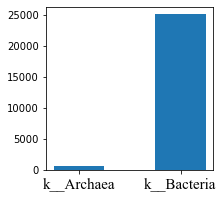

In [128]:
plt.figure(figsize=(3,3))
plt.bar(k_y['kingdom_n'],k_y['Count'], width = 0.5)
plt.xticks(k_y['kingdom_n'],k_label, fontproperties = 'Times New Roman', size = 15)
plt.show()

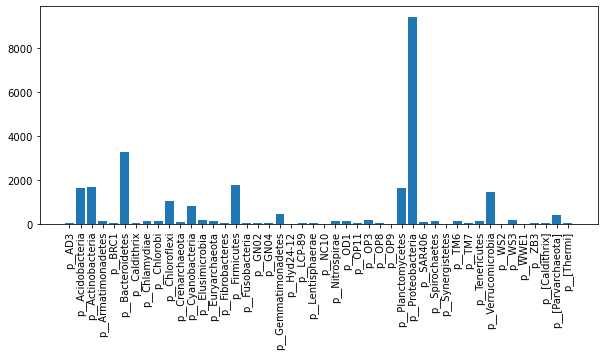

In [130]:
plt.figure(figsize=(10,4))
plt.bar(p_y['phylum_n'],p_y['Count'], width = 0.8)
plt.xticks(p_y['phylum_n'],p_label,rotation = 'vertical')
plt.show()

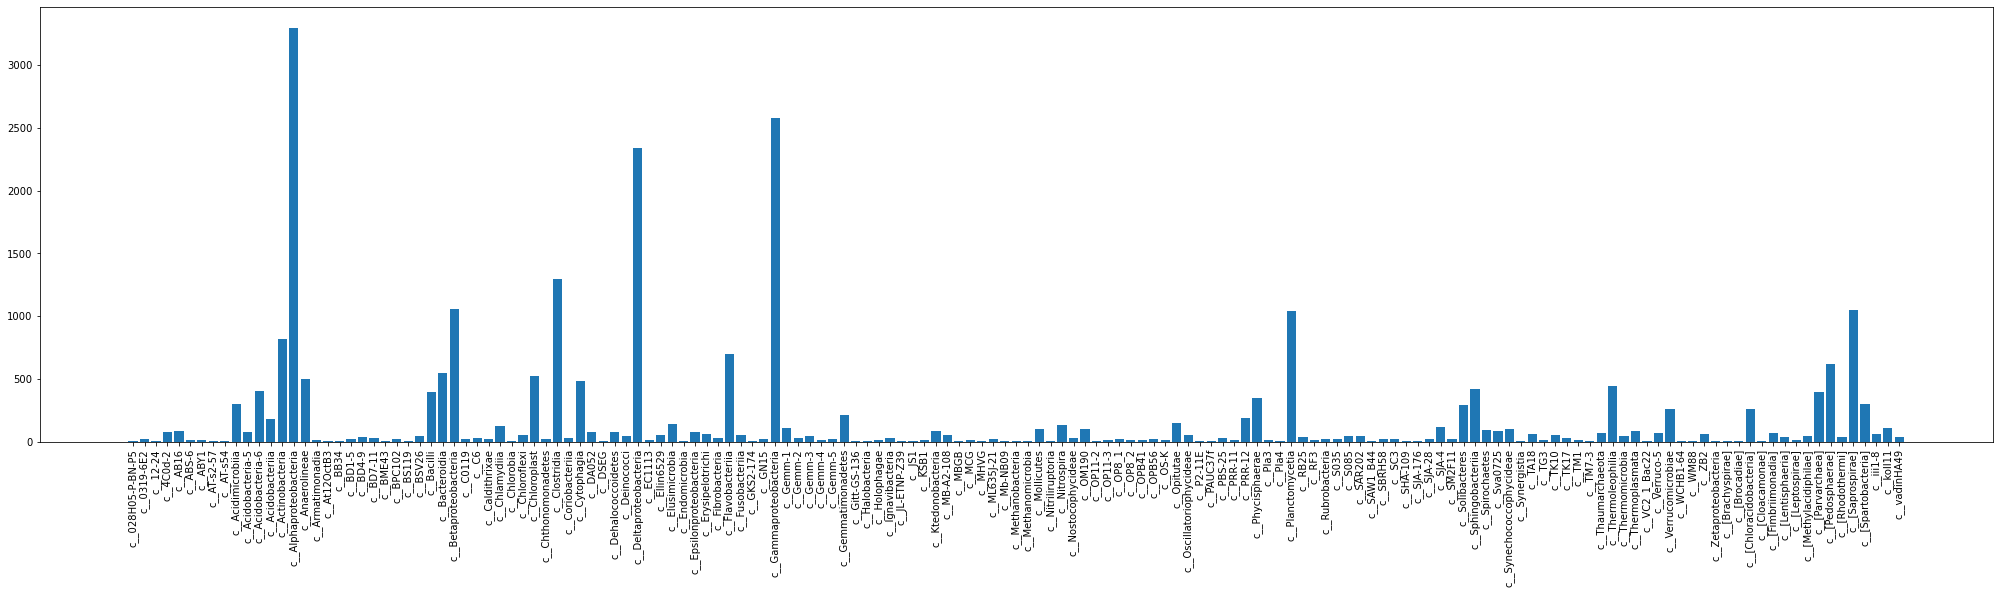

In [125]:
plt.figure(figsize=(35,8))
plt.bar(c_y['class_n'],c_y['Count'])
plt.xticks(c_y['class_n'],c_label,rotation = 'vertical')
plt.show()